<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/10)_%EB%B3%B4%ED%97%98%EC%B2%AD%EA%B5%AC_%EC%82%AC%EA%B8%B0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보험청구 사기 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 의미있는 변수 선택  
2) 사기 거래 특성 파악  
3) ML 활용 사기 거래 예측


In [2]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter10')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter10' ← 변경X
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제상황 및 데이터 살펴보기
---
>**시나리오**

```
최근 국제 유가가 떨어지고 있어, 기름값이 저렴해졌다. 이에 많은 사람들이 평소보다 더 차량을 구매하는 현상이 발생하고 있다.  
자동차 보험사는 신규 가입회원이 늘어나고 있어 행복한 하루를 보내고 있으나, 한편으로는 걱정이 많다. 그만큼 보험청구 사기 건수도  
증가하고 있기 때문이다.

```  

> **데이터 살펴보기**

* 보험 청구건에 대한 사고 관련 정보 및 청구 금액 정보
* 데이터 명세 ⬇

|claim_number|age_of_driver|gender|marital_status|safty_rating|annual_income|
|:---:|:---:|:---:|:---:|:---:|:---:|
|청구번호|연령|성별|결혼여부|안전점수|연봉|
|high_education_ind|address_change_ind|living_status|zip_code|claim_date|claim_day_of_week|
|고학력여부|주소변경여부|거주형태|우편번호|청구일자|청구요일|
|accident_site|past_num_of_claims|witness_present_ind|liab_prct|channel|policy_report_filed_ind|  
|사고지역|과거청구횟수|사고당시목격자여부|신뢰성|접수채널|경창리포트여부|
|claim_est_payout|age_of_vehicle|vehicle_category|vehicle_price|vehicle_color|vehicle_weight|
|지급보험료|자동차년식|자동차타입|자동차가격|자동차컬러|자동차무게|
|fraud|
|사기여부|

In [5]:
# Data read
import pandas as pd
bath ='/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter10_보험청구 사기 예측/'
df = pd.read_csv(bath + 'chapter10_insurance.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


## 문제해결 프로세스 정의
---
>**문제정의**

```
- 보험 청구 사기건수 증가
```

>**기대효과**

```
보험 청구 사기건수 감소
```

>**해결방안**

```
- 보험 청구 사기가능성이 높은 청구 건에 대해서 재심사를 통한 관리
- Session 1
  - Data 전처리와 의미있는 변수에 대해 고민해보고 탐색
- Session 2
  - Numeric(연속형, 숫자형) 변수와 categorical(범주형) 변수 탐색
- Session 3
  - ML 알고리즘을 활용하여 청구사기 예측
```

>**성과측정**

```
- 청구 사기 재심사 전/후 보험 사기건수 비교
```

>**현업 적용**

```
- 매 월 사전에 정의한 Data mart 생성 및 적재
- 매 월 model을 활용하여 사기 가능성이 높은 청구건 추출
- 재심사를 통한 사기거래 방지
```

## Session 1
## 의미있는 변수 선택

### Data 전처리

In [6]:
# Data shape
# 17998 row, 25 col 구성
print('df', df.shape)

df (17998, 25)


In [7]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [8]:
# null 값 확인
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [11]:
# null 값이 적은 col부터 drop
df = df.dropna(subset=['claim_est_payout', 'age_of_vehicle'])

In [12]:
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout             0
age_of_vehicle               0
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [13]:
# 0으로 충분히 해석할 수 있는 col은 0으로 변환
df['marital_status'].fillna(0.0, inplace=True)
df['witness_present_ind'].fillna(0.0, inplace=True)

In [14]:
df.isnull().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

In [15]:
df['fraud'].value_counts()

fraud
0    15161
1     2812
Name: count, dtype: int64

In [16]:
# 약 15.6%의 청구 사기
2812/(15161+2812)

0.15645690758359762

In [9]:
# Outlier 확인
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


###  의미있는 변수 선택  
---
* 의미있는 변수란  
  - 해당 변수에 의해서 예측하고자 하는 데이터가 *잘 구분* 되어지는 변수  
  

* Numeric 변수
  - 연속형 변수는 구간화를 통해 범주형 변수로 변경하고, *잘 구분* 되어지는지 확인   
  (※ 평균 사기거래률 대비 그룹핑한 그룹의 사기거래율이 차이가 나는 것)
  
* Categorical 변수
  - 각 그룹별 예측하고자 하는 데이터가 잘 나눠지는지 확인  
  (※ 각 그룹마다 사기거래율의 차이가 나는 것)


In [17]:
df['gender'].dtypes

dtype('O')

In [18]:
# numeric, categorical 변수 구분
numeric_list = []
categorical_list = []

for i in df.columns :
    if df[i].dtypes == 'O':
        categorical_list.append(i)
    else :
        numeric_list.append(i)

print('categorical_list : ', categorical_list)
print('numeric_list : ', numeric_list)

categorical_list :  ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
numeric_list :  ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [19]:
df[numeric_list]

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.452350,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.452180,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.181950,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.273440,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,1.0,93,42338,1,0,15012,0,0.0,99,0,4806.841803,6.0,32144.571850,16868.53410,0
17994,29996,35,0.0,22,35579,1,1,20111,1,0.0,94,1,4089.794471,3.0,9468.510601,31500.99689,1
17995,29997,27,1.0,81,32953,0,1,15012,2,0.0,1,1,2225.803056,5.0,64974.369590,44536.25506,0
17996,29999,52,1.0,86,39519,1,0,15026,1,1.0,75,1,9560.744844,3.0,24983.268110,50093.75959,0


## Session 2
## 사기 거래 특성 파악

### Numeric 변수
---

In [20]:
print('numeric_list:', numeric_list)

numeric_list: ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [22]:
df[numeric_list].head()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.45235,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.45218,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.18195,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.27344,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.21122,25876.56319,0


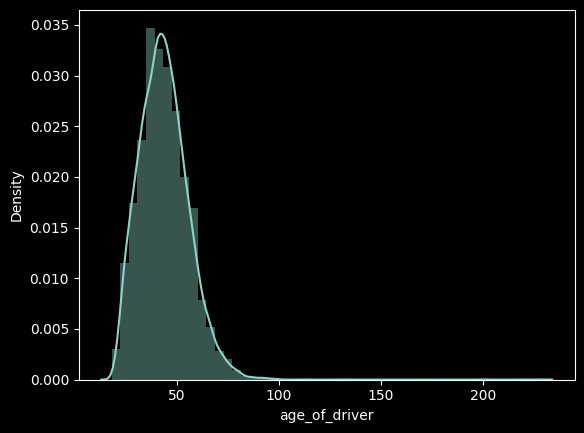

In [23]:
# age_of_driver 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['age_of_driver']);

In [24]:
# 구간화
import numpy as np
df['age_of_driver_gp'] = np.where(df['age_of_driver']<=30, 1,
                                  np.where(df['age_of_driver']<=50, 2, 3))

df[['age_of_driver', 'age_of_driver_gp']].head()

,age_of_driver,age_of_driver_gp
0,46,2
1,21,1
2,49,2
3,58,3
4,38,2


In [30]:
# 구간화에 따른 청구 사기율
num_val = 'age_of_driver_gp'

# 1단계
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = num_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.head()

,age_of_driver_gp,0,1,ratio
0,1,2047,378,15.6
1,2,8838,1981,18.3
2,3,4276,453,9.6


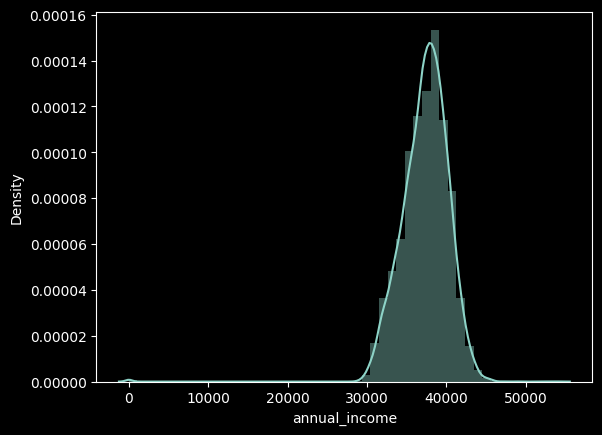

In [27]:
# annual_income 분포 확인
sns.distplot(df['annual_income']);

In [28]:
# 구간화
import numpy as np
df['annual_income_gp'] = np.where(df['annual_income'] <=35000, 1,
                                  np.where(df['annual_income']<=40000, 2, 3))

df[['annual_income', 'annual_income_gp']].head()

,annual_income,annual_income_gp
0,38301,2
1,30445,1
2,38923,2
3,40605,3
4,36380,2


In [31]:
# 구간화에 따른 청구 사기율
num_val = 'annual_income_gp'

# 1단계
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = num_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.head()

,annual_income_gp,0,1,ratio
0,1,3134,592,15.9
1,2,9222,1911,17.2
2,3,2805,309,9.9


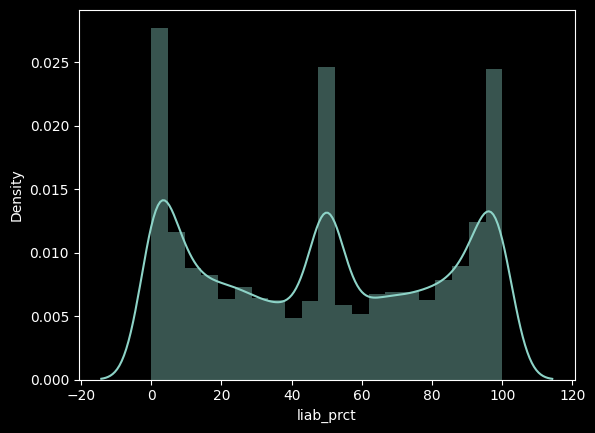

In [32]:
# liab_prct 분포 확인
sns.distplot(df['liab_prct']);

In [33]:
# 구간화
import numpy as np
df['liab_prct_gp'] = np.where(df['liab_prct'] <=25, 1,
                                  np.where(df['liab_prct']<=65, 2, 3))

df[['liab_prct', 'liab_prct_gp']].head()

,liab_prct,liab_prct_gp
0,74,3
1,79,3
2,0,1
3,99,3
4,7,1


In [34]:
# 구간화에 따른 청구 사기율
num_val = 'liab_prct_gp'

# 1단계
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = num_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.head()

,liab_prct_gp,0,1,ratio
0,1,4824,799,14.2
1,2,4868,1027,17.4
2,3,5469,986,15.3


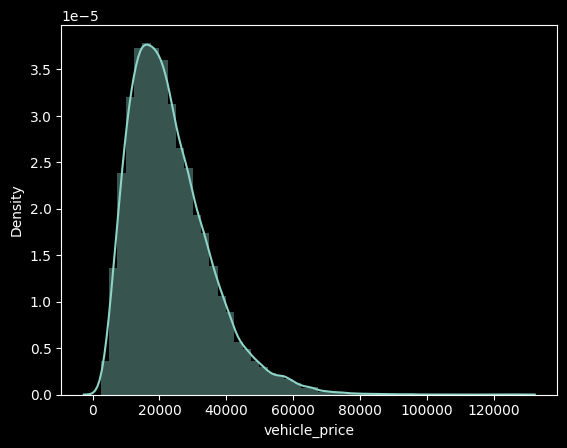

In [35]:
# vehicle_price 분포 확인
sns.distplot(df['vehicle_price']);

In [36]:
# 구간화
import numpy as np
df['vehicle_price_gp'] = np.where(df['vehicle_price'] <=20000, 1,
                                  np.where(df['vehicle_price']<=40000, 2, 3))

df[['vehicle_price', 'vehicle_price_gp']].head()

,vehicle_price,vehicle_price_gp
0,12885.45235,1
1,29429.45218,2
2,21701.18195,2
3,13198.27344,1
4,38060.21122,2


In [37]:
# 구간화에 따른 청구 사기율
num_val = 'vehicle_price_gp'

# 1단계
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = num_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.head()

,vehicle_price_gp,0,1,ratio
0,1,7058,1316,15.7
1,2,6742,1252,15.7
2,3,1361,244,15.2


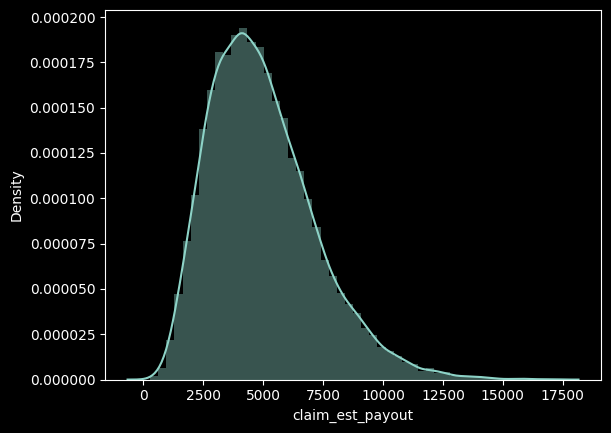

In [38]:
# claim_est_payout 분포 확인
sns.distplot(df['claim_est_payout']);

In [39]:
# 구간화
import numpy as np
df['claim_est_payout_gp'] = np.where(df['claim_est_payout'] <=3000, 1,
                                  np.where(df['claim_est_payout']<=6000, 2, 3))

df[['claim_est_payout', 'claim_est_payout_gp']].head()

,claim_est_payout,claim_est_payout_gp
0,7530.940993,3
1,2966.024895,1
2,6283.888333,3
3,6169.747994,3
4,4541.387150,2


In [40]:
# 구간화에 따른 청구 사기율
num_val = 'claim_est_payout_gp'

# 1단계
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = num_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.head()

,claim_est_payout_gp,0,1,ratio
0,1,2754,643,18.9
1,2,8116,1378,14.5
2,3,4291,791,15.6


### Categorical 변수
---

In [41]:
df[categorical_list]

,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,M,Rent,12/16/2016,Friday,Local,Broker,Compact,white
1,F,Rent,2/12/2015,Thursday,Highway,Online,Large,white
2,F,Own,12/6/2016,Tuesday,Local,Broker,Compact,white
3,F,Own,5/5/2016,Thursday,Local,Broker,Medium,other
4,M,Rent,10/27/2015,Tuesday,Highway,Broker,Medium,gray
...,...,...,...,...,...,...,...,...
17993,M,Own,3/28/2015,Saturday,Local,Broker,Medium,black
17994,F,Own,1/5/2015,Monday,Local,Phone,Medium,blue
17995,F,Rent,9/10/2016,Saturday,Local,Online,Medium,black
17996,F,Own,12/25/2015,Friday,Highway,Broker,Compact,white


In [42]:
df['claim_date'].head()

0    12/16/2016
1     2/12/2015
2     12/6/2016
3      5/5/2016
4    10/27/2015
Name: claim_date, dtype: object

In [43]:
# 날짜 데이터 전처리(* split 사용)
df['year'] = df['claim_date'].apply(lambda x : x.split('/')[2])
df['month'] = df['claim_date'].apply(lambda x : x.split('/')[0])

df[['claim_date', 'year', 'month']]

,claim_date,year,month
0,12/16/2016,2016,12
1,2/12/2015,2015,2
2,12/6/2016,2016,12
3,5/5/2016,2016,5
4,10/27/2015,2015,10
...,...,...,...
17993,3/28/2015,2015,3
17994,1/5/2015,2015,1
17995,9/10/2016,2016,9
17996,12/25/2015,2015,12


In [44]:
print('categorical_list : ', categorical_list)

categorical_list :  ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']


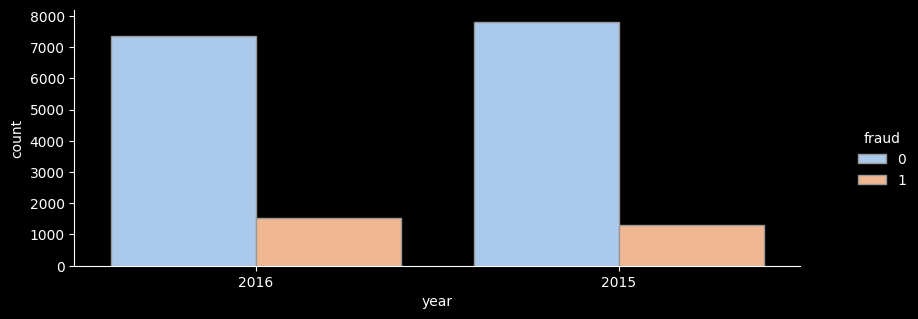

In [49]:
# 년도별 청구 사기율 비교
sns.catplot(x='year', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [51]:
# 구간화에 따른 청구 사기율
cat_val = 'year'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,year,0,1,ratio
1,2016,7355,1520,17.1
0,2015,7806,1292,14.2


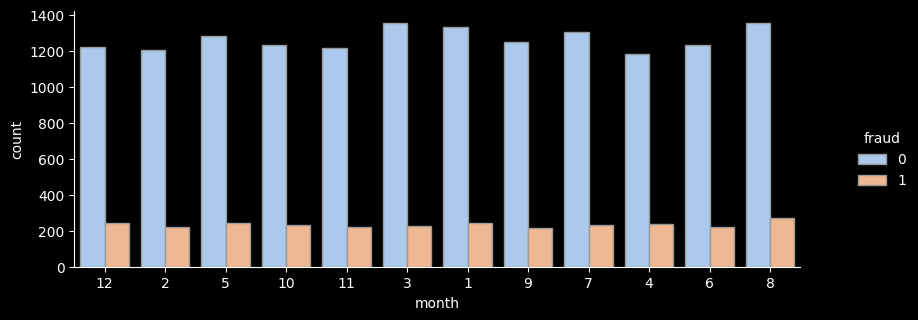

In [53]:
# 월별 청구 사기율 비교
sns.catplot(x='month', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [52]:
# 구간화에 따른 청구 사기율
cat_val = 'month'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,month,0,1,ratio
6,4,1182,240,16.9
3,12,1221,245,16.7
10,8,1355,271,16.7
1,10,1230,233,15.9
7,5,1280,242,15.9
2,11,1217,223,15.5
0,1,1334,243,15.4
4,2,1204,219,15.4
8,6,1232,220,15.2
9,7,1305,234,15.2


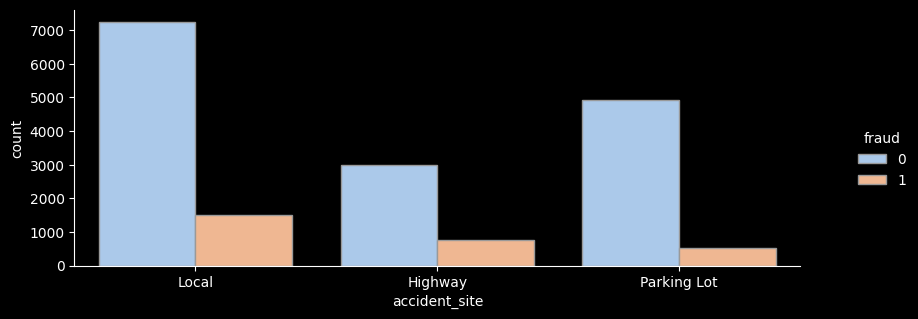

In [54]:
# 사고현장에 따른 청구 사기율 비교
sns.catplot(x='accident_site', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [56]:
# 고속도로 > 동네 > 주차장 순으로 사기 건이 많음
# 구간화에 따른 청구 사기율
cat_val = 'accident_site'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,accident_site,0,1,ratio
0,Highway,2980,772,20.6
1,Local,7251,1509,17.2
2,Parking Lot,4930,531,9.7


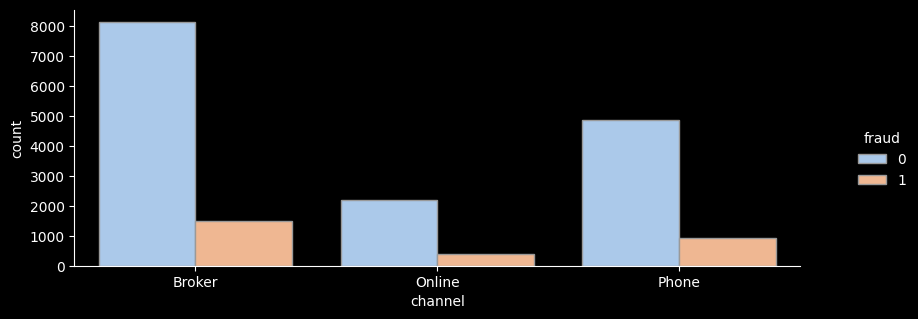

In [57]:
# 채널 따른 청구 사기율 비교
sns.catplot(x='channel', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [58]:
cat_val = 'channel'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,channel,0,1,ratio
2,Phone,4848,916,15.9
1,Online,2185,406,15.7
0,Broker,8128,1490,15.5


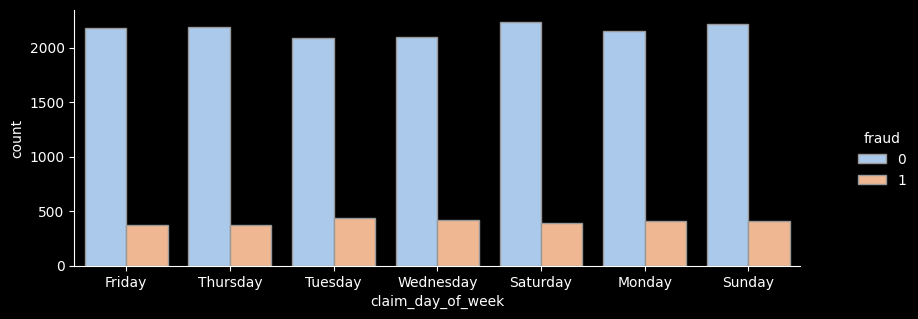

In [59]:
# 요일 따른 청구 사기율 비교
sns.catplot(x='claim_day_of_week', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [60]:
cat_val = 'claim_day_of_week'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,claim_day_of_week,0,1,ratio
5,Tuesday,2091,437,17.3
6,Wednesday,2094,418,16.6
1,Monday,2152,413,16.1
3,Sunday,2216,408,15.5
2,Saturday,2236,392,14.9
0,Friday,2180,371,14.5
4,Thursday,2192,373,14.5


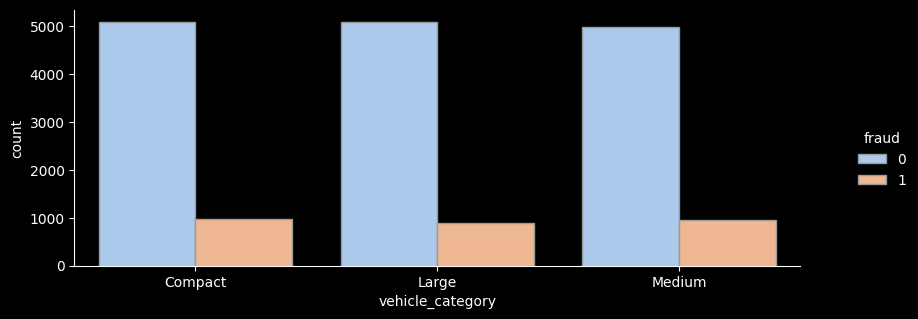

In [61]:
# 차량 범주 따른 청구 사기율 비교
sns.catplot(x='vehicle_category', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [62]:
cat_val = 'vehicle_category'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,vehicle_category,0,1,ratio
2,Medium,4988,956,16.1
0,Compact,5086,969,16.0
1,Large,5087,887,14.8


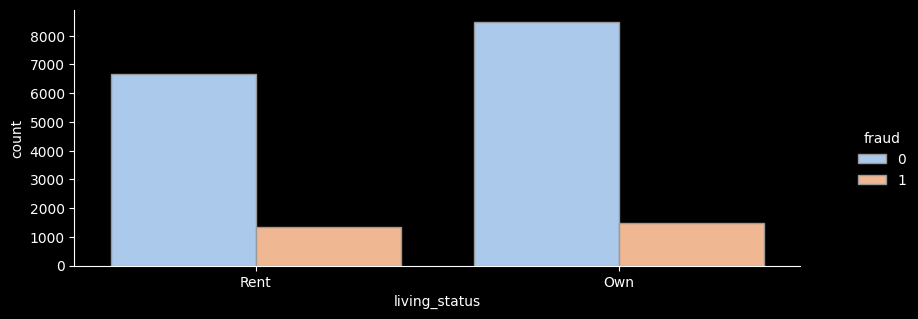

In [63]:
# living_status 따른 청구 사기율 비교
sns.catplot(x='living_status', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [65]:
cat_val = 'living_status'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,living_status,0,1,ratio
1,Rent,6676,1342,16.7
0,Own,8485,1470,14.8


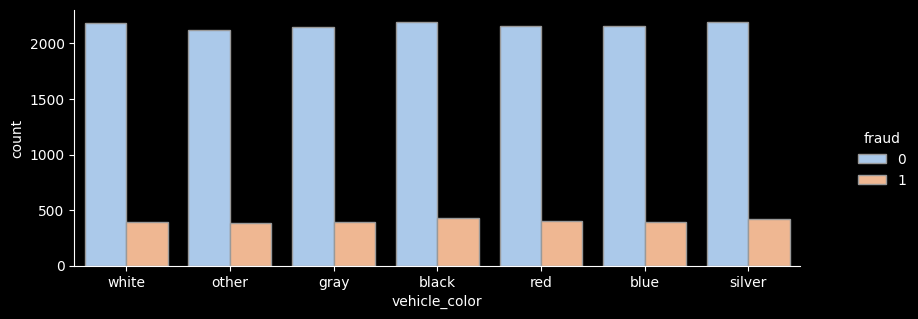

In [64]:
# vehicle_color 따른 청구 사기율 비교
sns.catplot(x='vehicle_color', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [66]:
cat_val = 'vehicle_color'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,vehicle_color,0,1,ratio
0,black,2191,427,16.3
5,silver,2195,419,16.0
4,red,2158,404,15.8
2,gray,2150,394,15.5
3,other,2125,386,15.4
1,blue,2155,390,15.3
6,white,2187,392,15.2


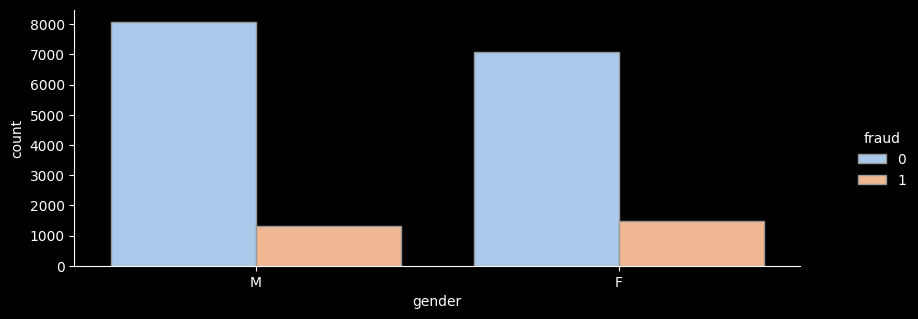

In [67]:
# gender 따른 청구 사기율 비교
sns.catplot(x='gender', hue='fraud', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)
plt.show()

In [74]:
cat_val = 'gender'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,gender,0,1,ratio
0,F,7081,1488,17.4
1,M,8080,1324,14.1


In [71]:
print('numeric_list :', numeric_list)

numeric_list : ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [77]:
# 경찰 리포트 존재 여부
cat_val = 'witness_present_ind'

# 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head()

# 2단계
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values='claim_number')

# 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names = ['']

# 4단계
df_pivot['ratio'] = round((df_pivot.iloc[:, 2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2]))*100, 1)
df_pivot.sort_values(by=['ratio'], ascending=False)

,witness_present_ind,0,1,ratio
0,0.0,11460,2364,17.1
1,1.0,3701,448,10.8



## Session 3  
## ML 활용 사기 거래 예측
---

### 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [78]:
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,vehicle_color,vehicle_weight,fraud,age_of_driver_gp,annual_income_gp,liab_prct_gp,vehicle_price_gp,claim_est_payout_gp,year,month
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,white,16161.33381,0,2,2,3,1,3,2016,12
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,white,28691.96422,0,1,1,3,2,1,2015,2
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,white,22090.94758,1,2,2,1,2,3,2016,12
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,other,38329.58106,1,3,3,3,1,3,2016,5
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,gray,25876.56319,0,2,2,1,2,2,2015,10


In [80]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud', 'age_of_driver_gp', 'annual_income_gp', 'liab_prct_gp',
       'vehicle_price_gp', 'claim_est_payout_gp', 'year', 'month'],
      dtype='object')

In [81]:
# 모델링을 학습하기 위한 X, Y 구분
# month는 새로운 파생 변수로 추가
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['claim_number', 'claim_date', 'year','age_of_driver_gp', 'annual_income_gp','liab_prct_gp',
       'vehicle_price_gp', 'claim_est_payout_gp','fraud'], axis=1)
Y=df['fraud']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(12581, 23)
(12581,)
(5392, 23)
(5392,)


In [83]:
categorical_list

['gender',
 'living_status',
 'claim_date',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color']

In [84]:
# 사용하지 않을 categorical 변수는 리스트에서 제외
categorical_list.remove('claim_date')

In [85]:
# 새로 추가한 변수는 없기 때문에 추가
categorical_list.append('month')
categorical_list

['gender',
 'living_status',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color',
 'month']

In [87]:
df[categorical_list].head()

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
0,M,Rent,Friday,Local,Broker,Compact,white,12
1,F,Rent,Thursday,Highway,Online,Large,white,2
2,F,Own,Tuesday,Local,Broker,Compact,white,12
3,F,Own,Thursday,Local,Broker,Medium,other,5
4,M,Rent,Tuesday,Highway,Broker,Medium,gray,10


In [88]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

gender
living_status
claim_day_of_week
accident_site
channel
vehicle_category
vehicle_color
month


In [89]:
x_train[categorical_list].head()

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
7701,0,0,5,2,0,1,5,6
3295,0,0,6,2,0,2,4,1
2592,1,1,5,2,1,1,3,0
592,1,0,5,0,2,1,5,0
2608,0,1,4,1,2,2,3,6


In [90]:
x_test[categorical_list].head()

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
6350,1,1,4,1,0,0,3,9
8813,0,0,4,2,0,2,3,9
5996,1,1,5,0,0,2,4,8
14350,1,0,2,0,0,0,3,7
5196,0,1,3,1,1,0,3,1


### 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능 평가

In [101]:
import lightgbm as lgb

# Hyper parameter setting

d_train = lgb.Dataset(x_train, label = y_train)

params = {}
params['learning_rate']=0.02
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['max_depth']=2
params['num_leaves']=4 # 최대 leaves는 2^(max_depth)
params['seed']=23456

# 학습
clf=lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 1968, number of negative: 10613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 12581, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156426 -> initscore=-1.685062
[LightGBM] [Info] Start training from score -1.685062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [110]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>=.3: # setting threshold to .5
        y_pred_train[i]=1
    else:
        y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0, len(y_pred_test)):
    if y_pred_test[i]>=.3: # setting threshold to .5
        y_pred_test[i]=1
    else:
        y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10613
           1       0.47      0.19      0.27      1968

    accuracy                           0.84     12581
   macro avg       0.67      0.58      0.59     12581
weighted avg       0.80      0.84      0.81     12581

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4548
           1       0.44      0.19      0.26       844

    accuracy                           0.84      5392
   macro avg       0.65      0.57      0.59      5392
weighted avg       0.80      0.84      0.81      5392



In [111]:
pd.Series(y_pred_test).value_counts()

0.0    5033
1.0     359
Name: count, dtype: int64

In [112]:
# 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.750007708371157
roc_score_test : 0.7161303650998094


In [115]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    # FPR : 암환자가 아닌 환자를 암환자라고 잘 못 예측한 비율
    # TPR : Recall
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

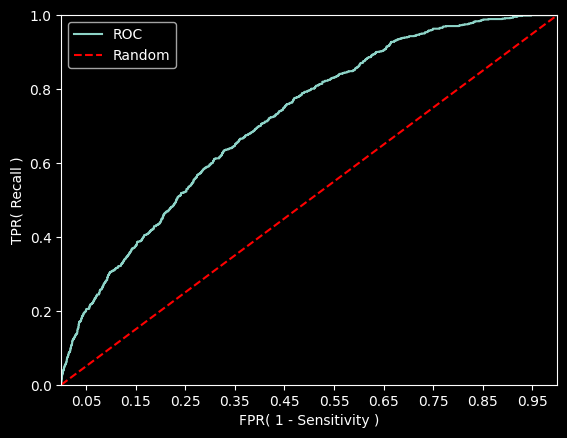

In [116]:
roc_curve_plot(y_test, y_pred_test_proba)

### 중요 변수 파악

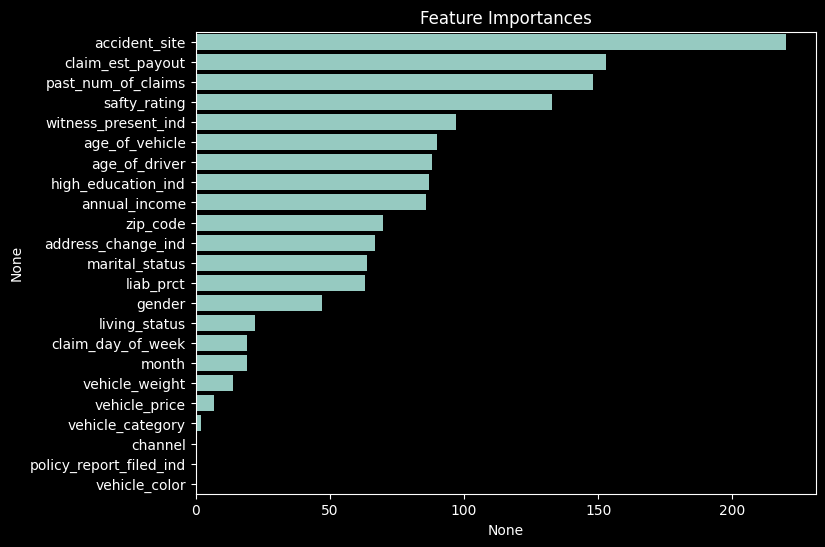

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

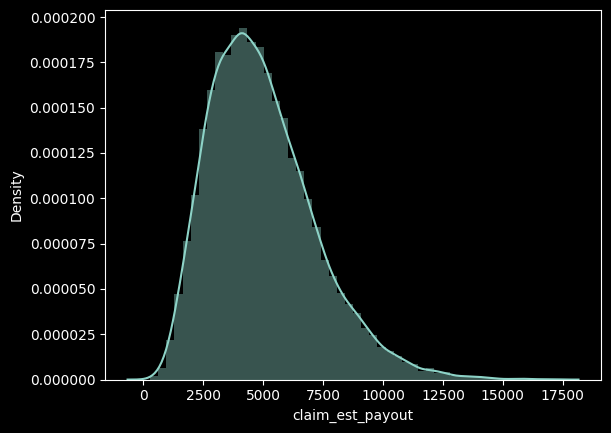

In [118]:
# 중요변수 상세 탐색
sns.distplot(df['claim_est_payout']);

In [121]:
# 구간화
import numpy as np
df['claim_est_payout_gp'] = np.where(df['claim_est_payout']<=2500, 1,
                                     np.where(df['claim_est_payout']<=7500, 2, 3))
df[['claim_est_payout', 'claim_est_payout_gp']]

,claim_est_payout,claim_est_payout_gp
0,7530.940993,3
1,2966.024895,2
2,6283.888333,2
3,6169.747994,2
4,4541.387150,2
...,...,...
17993,4806.841803,2
17994,4089.794471,2
17995,2225.803056,1
17996,9560.744844,3


In [122]:
df.groupby(['claim_est_payout_gp', 'fraud'])['fraud'].count()

claim_est_payout_gp  fraud
1                    0         1588
                     1          404
2                    0        11703
                     1         1998
3                    0         1870
                     1          410
Name: fraud, dtype: int64

In [124]:
# claim_est_payout(지급보험료)가 작은 청구건수 일수록 청구 사기건일 확률이 높음
print("gp1 :", 404 / (404+1588))
print("gp2 :", 1998 / (1998+11703))
print("gp3 :", 410 / (410+1870))

gp1 : 0.20281124497991967
gp2 : 0.14582877162250932
gp3 : 0.17982456140350878


### 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(clf)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)